In [ ]:
import os
from dotenv import load_dotenv
from image_helper import ImageHelper
from datetime import datetime

load_dotenv()

base_url = os.environ.get("STORAGE_URL")
assert base_url
im_helper = ImageHelper(base_url)

In [2]:
from plantcv import plantcv as pcv
import matplotlib
class options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg= False
        self.result = "results.json"
        self.outdir = "." # Store the output to the current directory

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

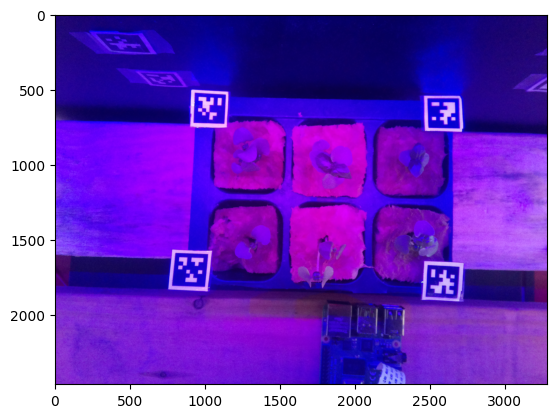

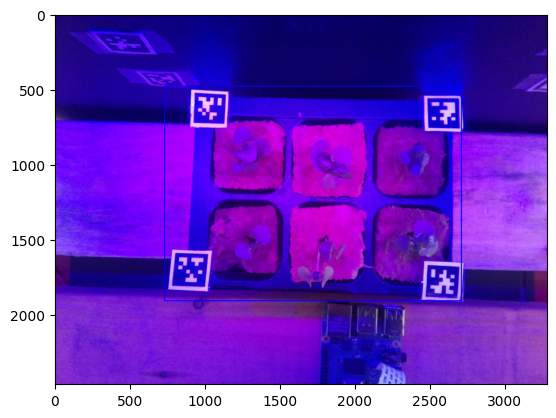

In [103]:
import image_helper
dt_str = '3/12/2022 19:08:18'
dt = im_helper.dt_from_string(dt_str)
assert(im_helper.get(dt, "top"))
img, path, filename = pcv.readimage(im_helper.image.name)
crop_img = pcv.crop(img=img, x=730, y=480, h=1430, w=1980)

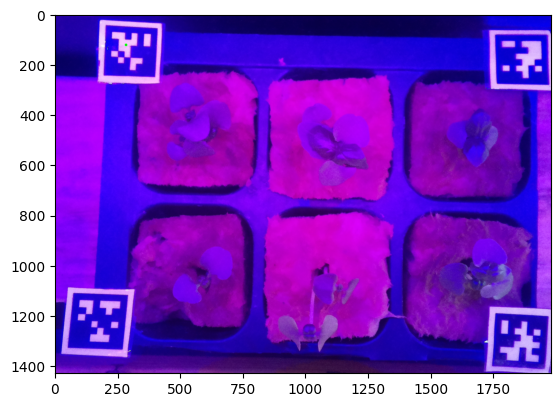

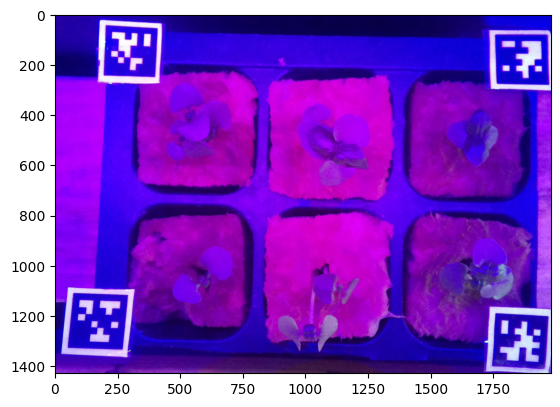

In [12]:
corrected_img = pcv.white_balance(img=crop_img, mode='hist', roi=[280, 120, 5, 5])

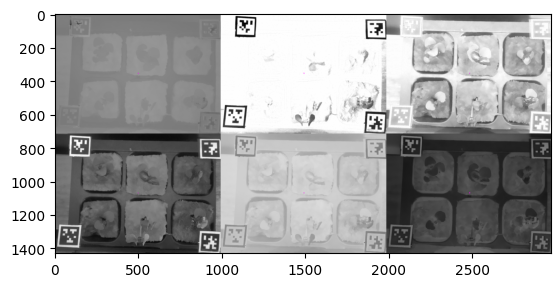

In [28]:
colorspaces = pcv.visualize.colorspaces(rgb_img=corrected_img, original_img=False)


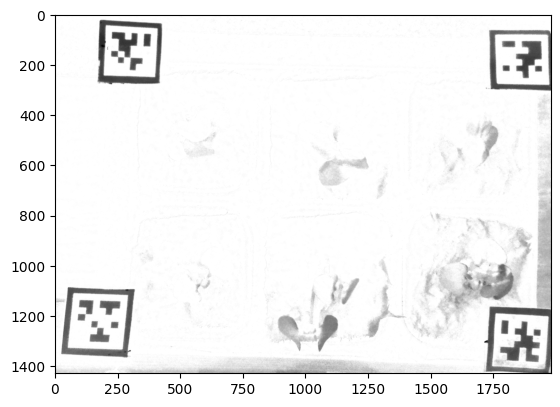

In [69]:
h = pcv.rgb2gray_hsv(rgb_img=crop_img, channel="s")

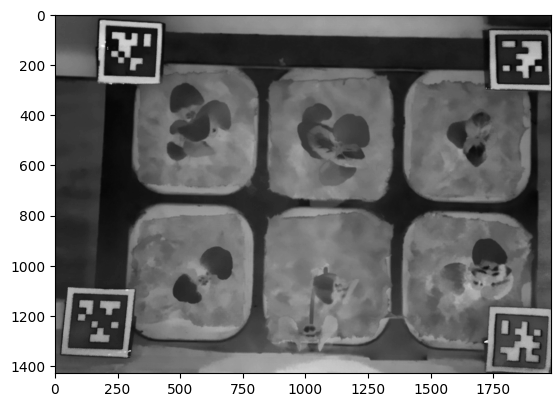

In [77]:
a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='b')


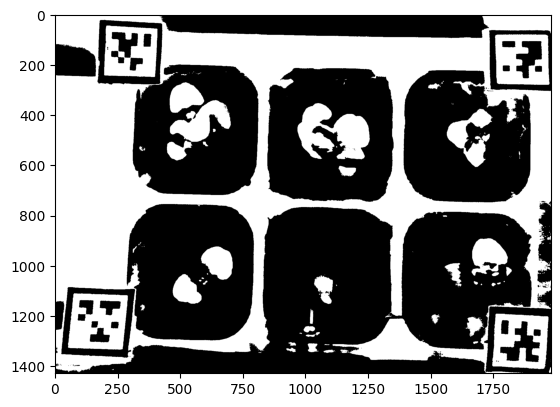

In [84]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=55, max_value=255, object_type='dark')

In [ ]:
def bin_thresh(img, thresh, rois):
    

In [102]:
# a_thresh is (y, x) (1430, 1980)
for i in a_thresh:
    print(len(i))

1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980


In [86]:
a_thresh.shape

(1430, 1980)

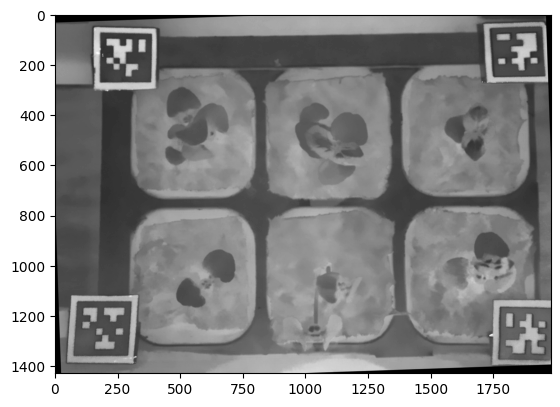

In [40]:
rotate_img = pcv.transform.rotate(a, 2, True)


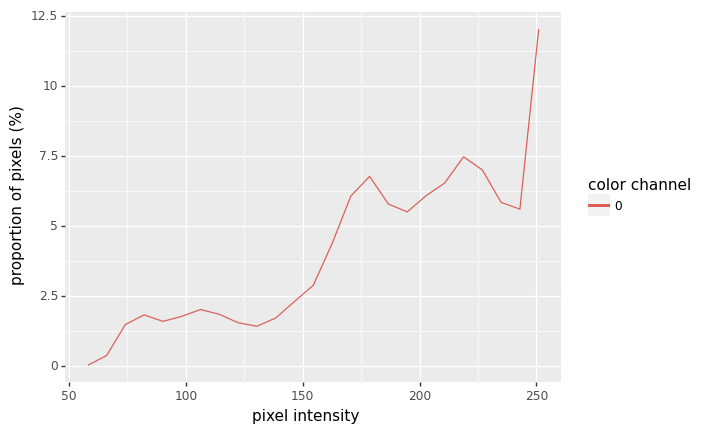

In [67]:
hist = pcv.visualize.histogram(img=h, bins=25)

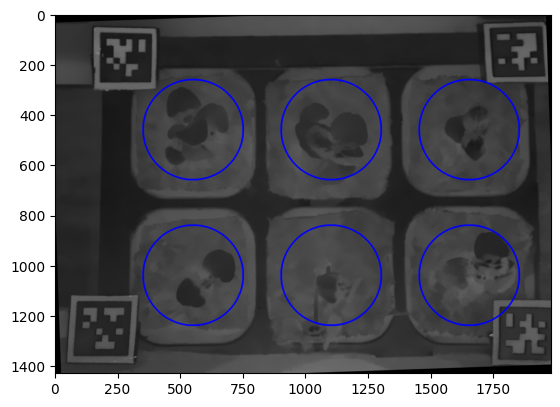

In [41]:
rois, roi_hierarchy = pcv.roi.multi(img=rotate_img, coord=(550,460), radius=200, 
                                    spacing=(550, 580), nrows=2, ncols=3)

In [104]:
mask = pcv.roi.roi2mask(img=img, contour=rois)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


In [100]:
rois[0][0][0]

array([[550, 260]], dtype=int32)

In [97]:
# rois[0] gives first circle
# rois[0][0] gives list of all pixels in first circle
len(rois[0][0])

1128

In [42]:
plant_ids = range(0, len(rois))


In [ ]:
# Create a copy of the original image for annotations

# Inputs:
#   img = rgb image
img_copy = np.copy(img)

# Set debug to None (plotting all of the images would be very verbose output)
pcv.params.debug = None

# Create a for loop to interate through every ROI (plant) in the image
for i in range(0, len(rois)):
    # The ith ROI, ROI hierarchy, and plant ID
    roi = rois[i]
    hierarchy = roi_hierarchy[i]
    plant_id = plant_ids[i]
    # Subset objects that overlap the ROI
    # Inputs:
    #   img            = input image
    #   roi_contour    = a single ROI contour
    #   roi_hierarchy  = a single ROI hierarchy
    #   object_contour = all objects detected in a binary mask
    #   obj_hierarchy  = all object hierarchies
    #   roi_type       = "partial" (default) keeps contours that overlap
    #                    or are contained in the ROI. "cutto" cuts off
    #                    contours that fall outside the ROI. "largest"
    #                    only keeps the largest object within the ROI
    plant_contours, plant_hierarchy, mask, area = pcv.roi_objects(img=img, 
                                                                  roi_contour=roi, 
                                                                  roi_hierarchy=hierarchy, 
                                                                  object_contour=obj, 
                                                                  obj_hierarchy=obj_hierarchy, 
                                                                  roi_type="partial")

    # If the plant area is zero then no plant was detected for the ROI
    # and no measurements can be done
    if area > 0:
        # Combine contours together for each plant
        # Inputs:
        #   img       = input image
        #   contours  = contours that will be consolidated into a single object
        #   hierarchy = the relationship between contours
        plant_obj, plant_mask = pcv.object_composition(img=img, 
                                                       contours=plant_contours, 
                                                       hierarchy=plant_hierarchy)        
        # Analyze the shape of each plant
        # Inputs:
        #   img   = input image
        #   obj   = composed object contours
        #   mask  = binary mask that contours were derived from
        #   label = a label for the group of measurements (default = "default")
        img_copy = pcv.analyze_object(img=img_copy, obj=plant_obj, 
                                      mask=plant_mask, label=f"plant{plant_id}")

pcv.plot_image(img_copy)

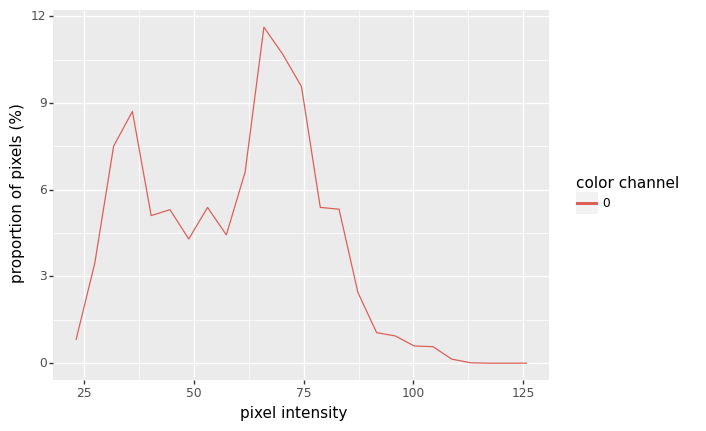

In [61]:
hist = pcv.visualize.histogram(img=a, bins=25)

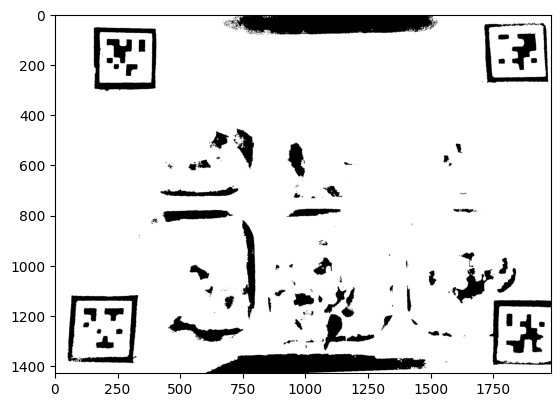

In [50]:
a_thresh = pcv.threshold.binary(gray_img=rotate_img, threshold=80, max_value=255, object_type='dark')

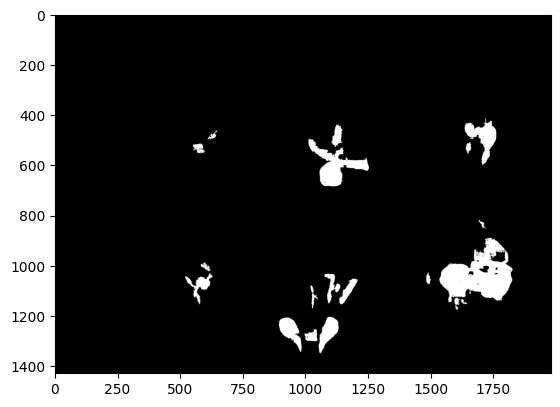

In [13]:
a_fill = pcv.fill(bin_img=a_thresh, size=200)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


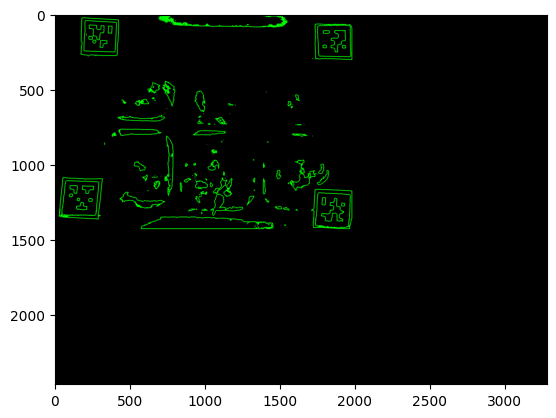

(<matplotlib.image.AxesImage at 0x7fbfd1643e80>, None)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 80

#get threshold image
ret,thresh_img = cv2.threshold(a, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
 
plt.imshow(img_contours,'gray'),plt.show()

In [4]:
import cv2
import numpy as np
# proccess image
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# get threshold image
ret, thresh_img = cv2.threshold(img_grey, 100, 255, cv2.THRESH_BINARY)
# find contours
contours, hierarchy = cv2.findContours(
    thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE
)

# create an empty image for contours
img_contours = np.zeros(img.shape)

max_contour = contours[0]
for contour in contours:
    if (
        cv2.contourArea(contour) > cv2.contourArea(max_contour)
        and cv2.contourArea(contour) < 100000
    ):
        max_contour = contour

contour = max_contour
approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
x, y, w, h = cv2.boundingRect(approx)

square_area = (x - w) * (y - h)


In [34]:
import cv2

cv2.imwrite("test1.png",corrected_img)

True

In [16]:
import cv2

print("[INFO] loading image...")
image = cv2.imread(im_helper.image.name)
print(image.shape)
image = image[500:1950, 0:3280]
image = cv2.resize(image, (image.shape[0]//2, image.shape[1]//2))
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("test3.png",image)


[INFO] loading image...
(2464, 3280, 3)
(1640, 725, 3)


True

In [12]:
import apriltag
import cv2

april_tag_real_size = 15.5 #mm
# load the input image and convert it to grayscale
print("[INFO] loading image...")
image = cv2.imread(im_helper.image.name)
image = image[500:1500, 730:1980]
image = cv2.resize(image, (image.shape[0]//2, image.shape[1]//2))
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# define the AprilTags detector options and then detect the AprilTags in the input image
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

# loop over the AprilTag detection results
tag_coordinates={}
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))
	#find the tag id
	id = r.tag_id
	#log the tag
	tag_coordinates[id] = [cX,cY]
# show the output image after AprilTag detection
display_image = cv2.resize(image, (image.shape[0]//2, image.shape[1]//2))
cv2.imshow("Image", display_image)
print(tag_coordinates)
cv2.waitKey(0)

[INFO] loading image...
(625, 500, 3)
[INFO] detecting AprilTags...
[INFO] 1 total AprilTags detected
[INFO] tag family: tag36h11
{0: [121, 81]}


225